In [2]:
#Dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Import Clean Data
data_file = os.path.join("Revised National Names Male.csv")
national_names_male_df = pd.read_csv(data_file)
data_file = os.path.join("Revised National Names Female.csv")
national_names_female_df = pd.read_csv(data_file)
national_names_male_df.head()

,Unnamed: 0,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,0,943,John,1880,M,9655,1,1880,5084943
1,1,944,William,1880,M,9532,2,1880,4055473
2,2,945,James,1880,M,5927,3,1880,5105919
3,3,946,Charles,1880,M,5348,4,1880,2364332
4,4,947,George,1880,M,5126,5,1880,1454503


In [4]:
#Drop unneeded column
national_names_male_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_female_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_male_df.head()

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,943,John,1880,M,9655,1,1880,5084943
1,944,William,1880,M,9532,2,1880,4055473
2,945,James,1880,M,5927,3,1880,5105919
3,946,Charles,1880,M,5348,4,1880,2364332
4,947,George,1880,M,5126,5,1880,1454503


In [107]:
#Merge Dataframes
df_merge = pd.merge(national_names_female_df, national_names_male_df, how='outer', left_on=['Name','Year'], right_on=['Name','Year'])
df_merge_needed = df_merge[['Name','Year', 'Count_x', 'Count_y']]
df_merge_needed.columns = ['Name','Year', 'Female Count', 'Male Count']
df_merge_needed.sort_values('Male Count', ascending = False).head()

,Name,Year,Female Count,Male Count
239187,James,1947,257.0,94755.0
302925,Michael,1957,254.0,92709.0
239225,Robert,1947,236.0,91642.0
296031,Michael,1956,244.0,90633.0
309894,Michael,1958,295.0,90519.0


In [6]:
#Find Names that are gender neutral 
total_names = df_merge_needed.groupby("Name").sum().sort_values('Female Count', ascending=False)
total_names['Total Counts']= total_names['Female Count']+total_names['Male Count']
total_names['Percentage Male']= total_names['Male Count']/total_names['Total Counts']*100
total_names = total_names.sort_values('Percentage Male', ascending=False)

In [108]:
#Only show names that are most gender neutral
middle = total_names[(total_names['Percentage Male']<=60) & (total_names['Percentage Male']>=40)]
middle.sort_values('Total Counts', ascending = False).head(10)

,Year,Female Count,Male Count,Total Counts,Percentage Male
Name,,,,,
Casey,236407,75060.0,108595.0,183655.0,59.129890
Riley,262845,81605.0,87494.0,169099.0,51.741288
Jackie,226954,90337.0,78148.0,168485.0,46.382764
Jaime,194535,49480.0,65697.0,115177.0,57.040034
Peyton,223040,58567.0,44037.0,102604.0,42.919379
Kerry,186865,48452.0,49417.0,97869.0,50.493006
Frankie,262845,32355.0,39894.0,72249.0,55.217373
Robbie,255313,22215.0,20676.0,42891.0,48.205917
Emerson,262845,13225.0,19477.0,32702.0,59.559048


In [109]:
sorted_male_df = national_names_male_df.sort_values(['Name','Year'])
sorted_male_df['Change'] = abs(sorted_male_df.groupby('Name')['Count'].diff(1))
sorted_female_df = national_names_female_df.sort_values(['Name','Year'])
sorted_female_df['Change'] = abs(sorted_female_df.groupby('Name')['Count'].diff(1))
sorted_male_df.sort_values('Change', ascending = False).head(10)

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count,Change
188365,427038,Robert,1946,M,84130,2,1880,4796695,14204.0
188366,427039,John,1946,M,79248,3,1880,5084943,13125.0
188364,427037,James,1946,M,87425,1,1880,5105919,12975.0
188368,427041,Richard,1946,M,58859,5,1880,2555330,12814.0
192385,437163,David,1947,M,57797,6,1880,3577704,11362.0
188370,427043,Michael,1946,M,41178,7,1880,4309198,11266.0
41283,101885,John,1912,M,24587,1,1880,5084943,11142.0
271977,640955,John,1965,M,71563,2,1880,5084943,10973.0
295268,705953,Jason,1970,M,27296,13,1880,1014584,10792.0
172587,389720,James,1942,M,77173,1,1880,5105919,10454.0


In [110]:
sorted_female_df.sort_values('Change', ascending = False).head(10)

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count,Change
238672,431053,Linda,1947,F,99680,1,1880,1450843,46972.0
177025,321477,Shirley,1935,F,42357,2,1880,684656,19521.0
542928,922326,Ashley,1983,F,33292,4,1917,834720,18444.0
262992,472232,Deborah,1951,F,42043,4,1880,739273,12972.0
68512,119721,Mary,1915,F,58187,1,1880,4115282,12843.0
401339,696596,Jennifer,1970,F,46160,1,1916,1462742,12455.0
494304,844711,Amanda,1979,F,31926,3,1880,781807,11406.0
232986,421351,Linda,1946,F,52708,2,1880,1450843,11243.0
619594,1045688,Brittany,1989,F,37786,3,1963,356473,10971.0
368980,645375,Michelle,1966,F,27152,4,1915,804495,10937.0


In [136]:
top_changes_female = sorted_female_df.sort_values('Change', ascending = False).head(10)

In [137]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

fig = render_mpl_table(top_changes_female.head(10), header_columns=0, col_width=2.0)

In [140]:
plt.savefig('topfemalechanges' +'.png')

In [142]:
top_changes_male = sorted_male_df.sort_values('Change', ascending = False).head(10)
fig = render_mpl_table(top_changes_male.head(10), header_columns=0, col_width=2.0)
plt.savefig('topmalechanges' +'.png')

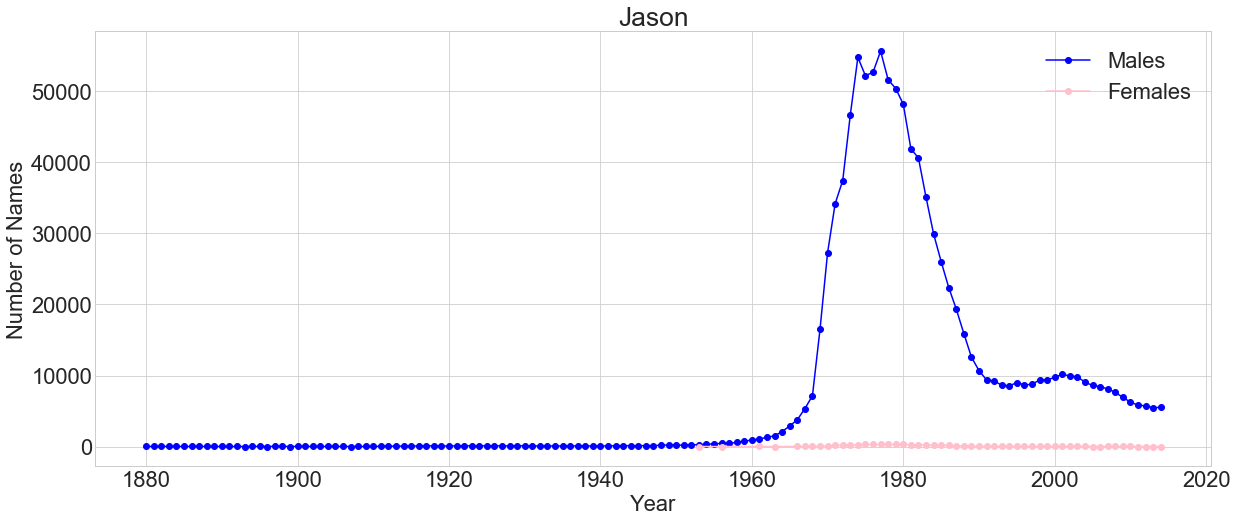

In [116]:
jason_male = national_names_male_df[national_names_male_df['Name']=='Jason'].sort_values('Year')
jason_female = national_names_female_df[national_names_female_df['Name']=='Jason'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jason_male["Year"], jason_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jason_female["Year"], jason_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jason')
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    #plt.savefig ('Jason' +'.png')
    plt.show()


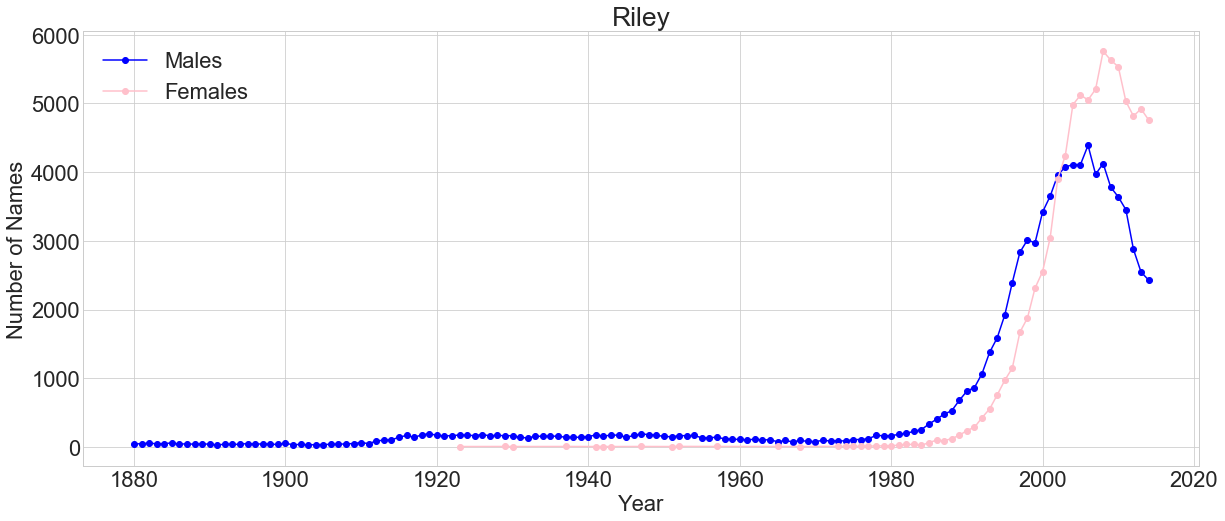

In [70]:
riley_male = national_names_male_df[national_names_male_df['Name']=='Riley'].sort_values('Year')
riley_female = national_names_female_df[national_names_female_df['Name']=='Riley'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(riley_male["Year"], riley_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(riley_female["Year"], riley_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Riley')
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    #plt.savefig ('Riley' +'.png')
    plt.show()


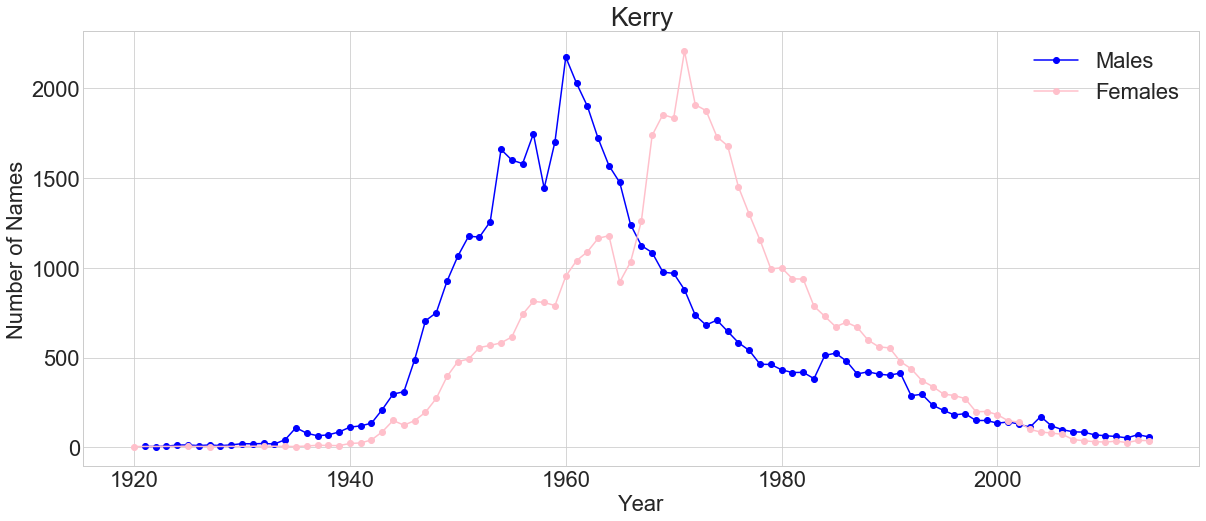

In [69]:
kerry_male = national_names_male_df[national_names_male_df['Name']=='Kerry'].sort_values('Year')
kerry_female = national_names_female_df[national_names_female_df['Name']=='Kerry'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(kerry_male["Year"], kerry_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(kerry_female["Year"], kerry_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Kerry')
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    #plt.savefig ('Kerry' +'.png')
    plt.show()


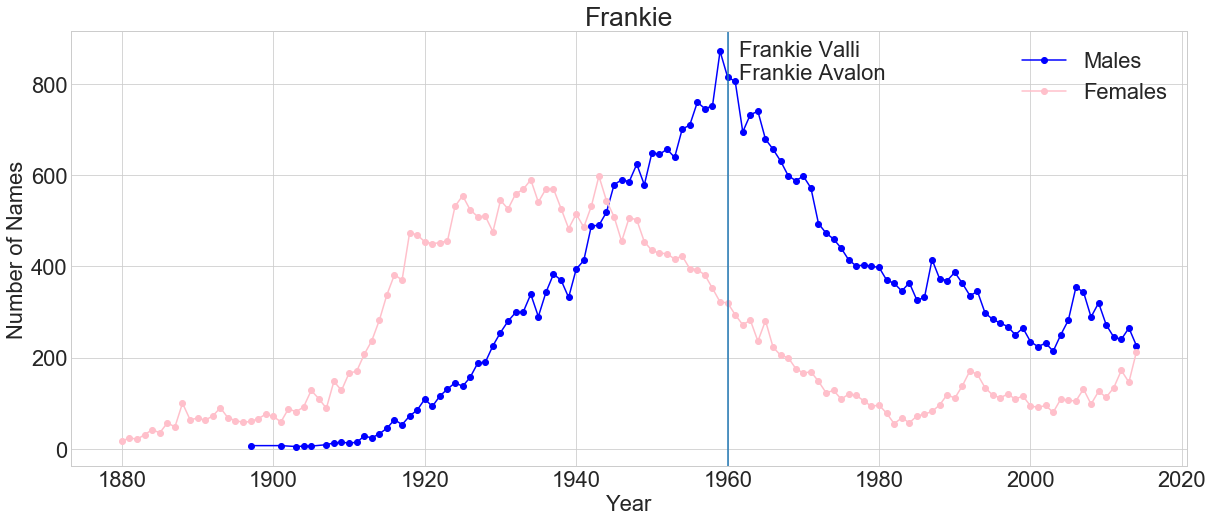

In [71]:
frankie_male = national_names_male_df[national_names_male_df['Name']=='Frankie'].sort_values('Year')
frankie_female = national_names_female_df[national_names_female_df['Name']=='Frankie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(frankie_male["Year"], frankie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(frankie_female["Year"], frankie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Frankie')    
    plt.axvline(1960)
    plt.text(1961.5, 810,'Frankie Valli\nFrankie Avalon')
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    #plt.savefig ('Frankie' +'.png')
    plt.show()

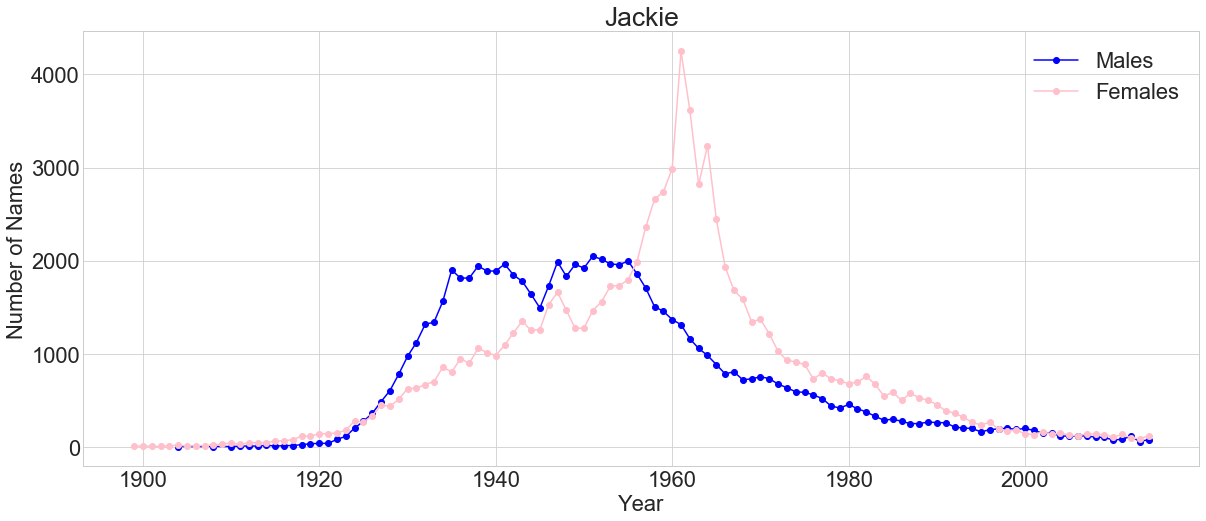

In [73]:
jackie_male = national_names_male_df[national_names_male_df['Name']=='Jackie'].sort_values('Year')
jackie_female = national_names_female_df[national_names_female_df['Name']=='Jackie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jackie_male["Year"], jackie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jackie_female["Year"], jackie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jackie')
    plt.savefig ('Jackie' +'.png')

    plt.show()

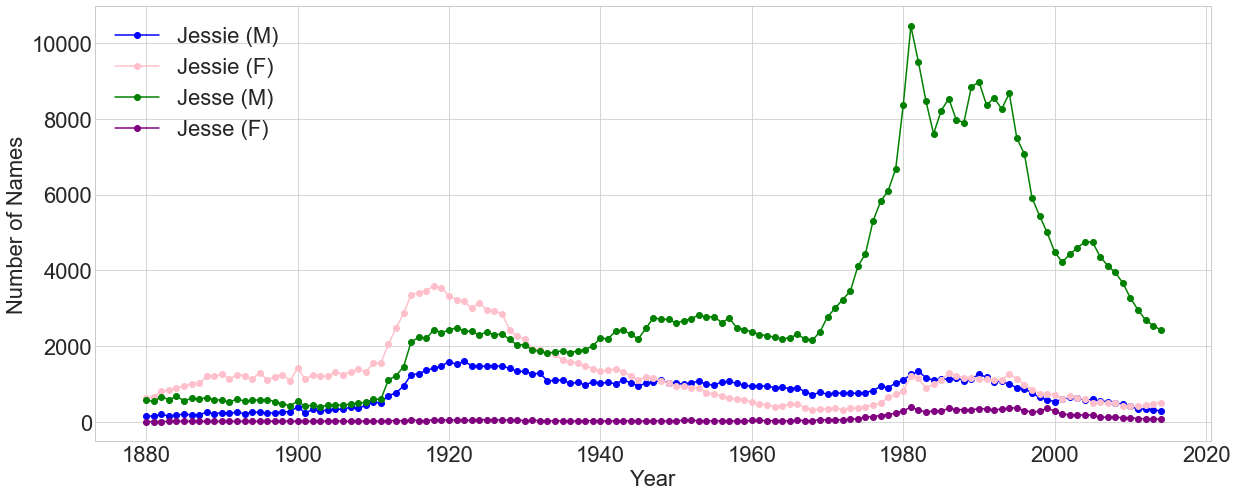

In [74]:
jesse_male = national_names_male_df[national_names_male_df['Name']=='Jesse'].sort_values('Year')
jesse_female = national_names_female_df[national_names_female_df['Name']=='Jesse'].sort_values('Year')
jessie_male = national_names_male_df[national_names_male_df['Name']=='Jessie'].sort_values('Year')
jessie_female = national_names_female_df[national_names_female_df['Name']=='Jessie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jessie_male["Year"], jessie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jessie_female["Year"], jessie_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(jesse_male["Year"], jesse_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(jesse_female["Year"], jesse_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Jessie (M)", "Jessie (F)", "Jesse (M)", "Jesse (F)"])
    plt.savefig ('Jessie' +'.png')

    plt.show()

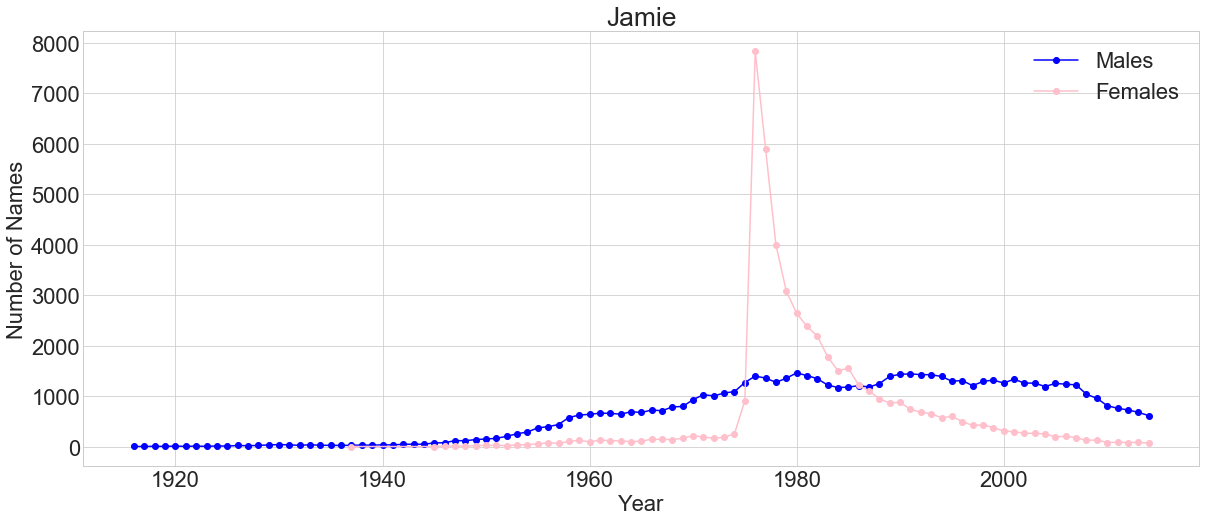

In [75]:
jaime_male = national_names_male_df[national_names_male_df['Name']=='Jaime'].sort_values('Year')
jaime_female = national_names_female_df[national_names_female_df['Name']=='Jaime'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jaime_male["Year"], jaime_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jaime_female["Year"], jaime_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jamie')    
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    #plt.savefig ('Jaime' +'.png')
    plt.show()


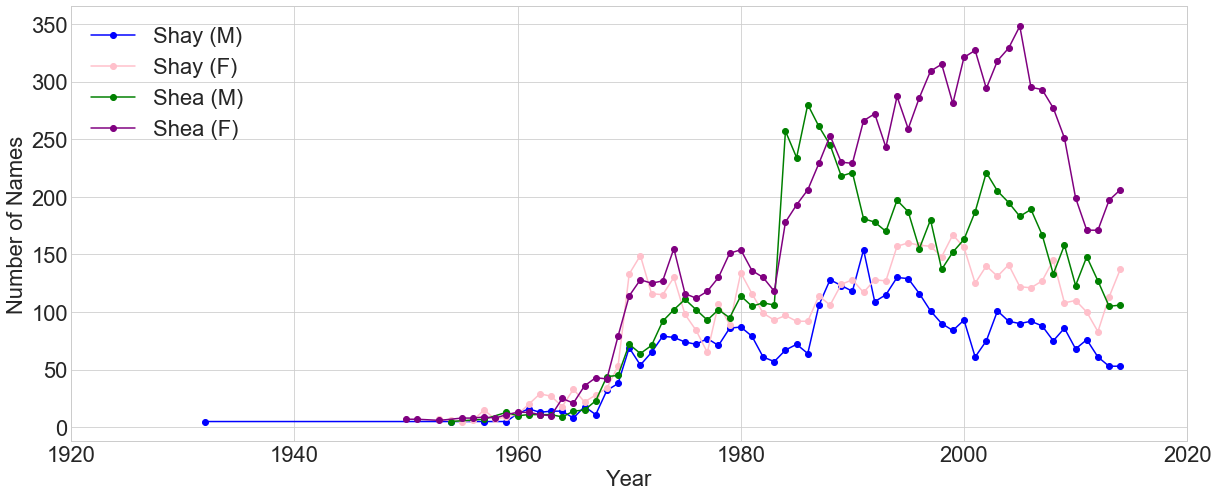

In [80]:
shea_male = national_names_male_df[national_names_male_df['Name']=='Shea'].sort_values('Year')
shea_female = national_names_female_df[national_names_female_df['Name']=='Shea'].sort_values('Year')
shay_male = national_names_male_df[national_names_male_df['Name']=='Shay'].sort_values('Year')
shay_female = national_names_female_df[national_names_female_df['Name']=='Shay'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(shay_male["Year"], shay_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(shay_female["Year"], shay_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(shea_male["Year"], shea_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(shea_female["Year"], shea_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Shay (M)", "Shay (F)", "Shea (M)", "Shea (F)"])
    plt.savefig ('Shay' +'.png')
    plt.xlim(1920, 2020)
    plt.show()
